## Reading & Understanding the Dataset

In [ ]:
#Import required modules for datafram manipulation 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option('MAX_COLUMNS', None)

#Import Scikit Learn module 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [ ]:
car_data = pd.read_csv("CarPrice_Assignment.csv")
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

From the output we can conclude that there are no null values, this is relevant when cleaning the dataset

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Cleaning the Data

According to the dictionary the data type for "symboling" should not be integer

In [ ]:
car_data['symboling'] = car_data['symboling'].astype(str)

In [ ]:
pd.DataFrame({'missing':car_data.isna().mean(),
             'unicos':car_data.nunique(),
             'typs': car_data.dtypes})

,missing,unicos,typs
car_ID,0.0,205,int64
symboling,0.0,6,object
CarName,0.0,147,object
fueltype,0.0,2,object
aspiration,0.0,2,object
doornumber,0.0,2,object
carbody,0.0,5,object
drivewheel,0.0,3,object
enginelocation,0.0,2,object
wheelbase,0.0,53,float64


The above verifies that there is no null value, the number of unique values in the columns and the data type 

The "CarName" feature lists out the car brand name and the model, this leave us with too many unique variable. To get only the car brand we would split once the split command finds a space. This would also be useful for visualization

In [ ]:
car_data['CarName'] = car_data['CarName'].str.split(' ',expand=True)
car_data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Notice that some variables have been spelled wrongly or shortened. For uniformity we would keep one unique name for variable 

In [ ]:
car_data['CarName'] = car_data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
car_data["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Visualization

In [ ]:
cat_col = car_data.select_dtypes(include=['object']).columns
num_col = car_data.select_dtypes(exclude=['object']).columns
df_cat = car_data[cat_col]
df_num = car_data[num_col]


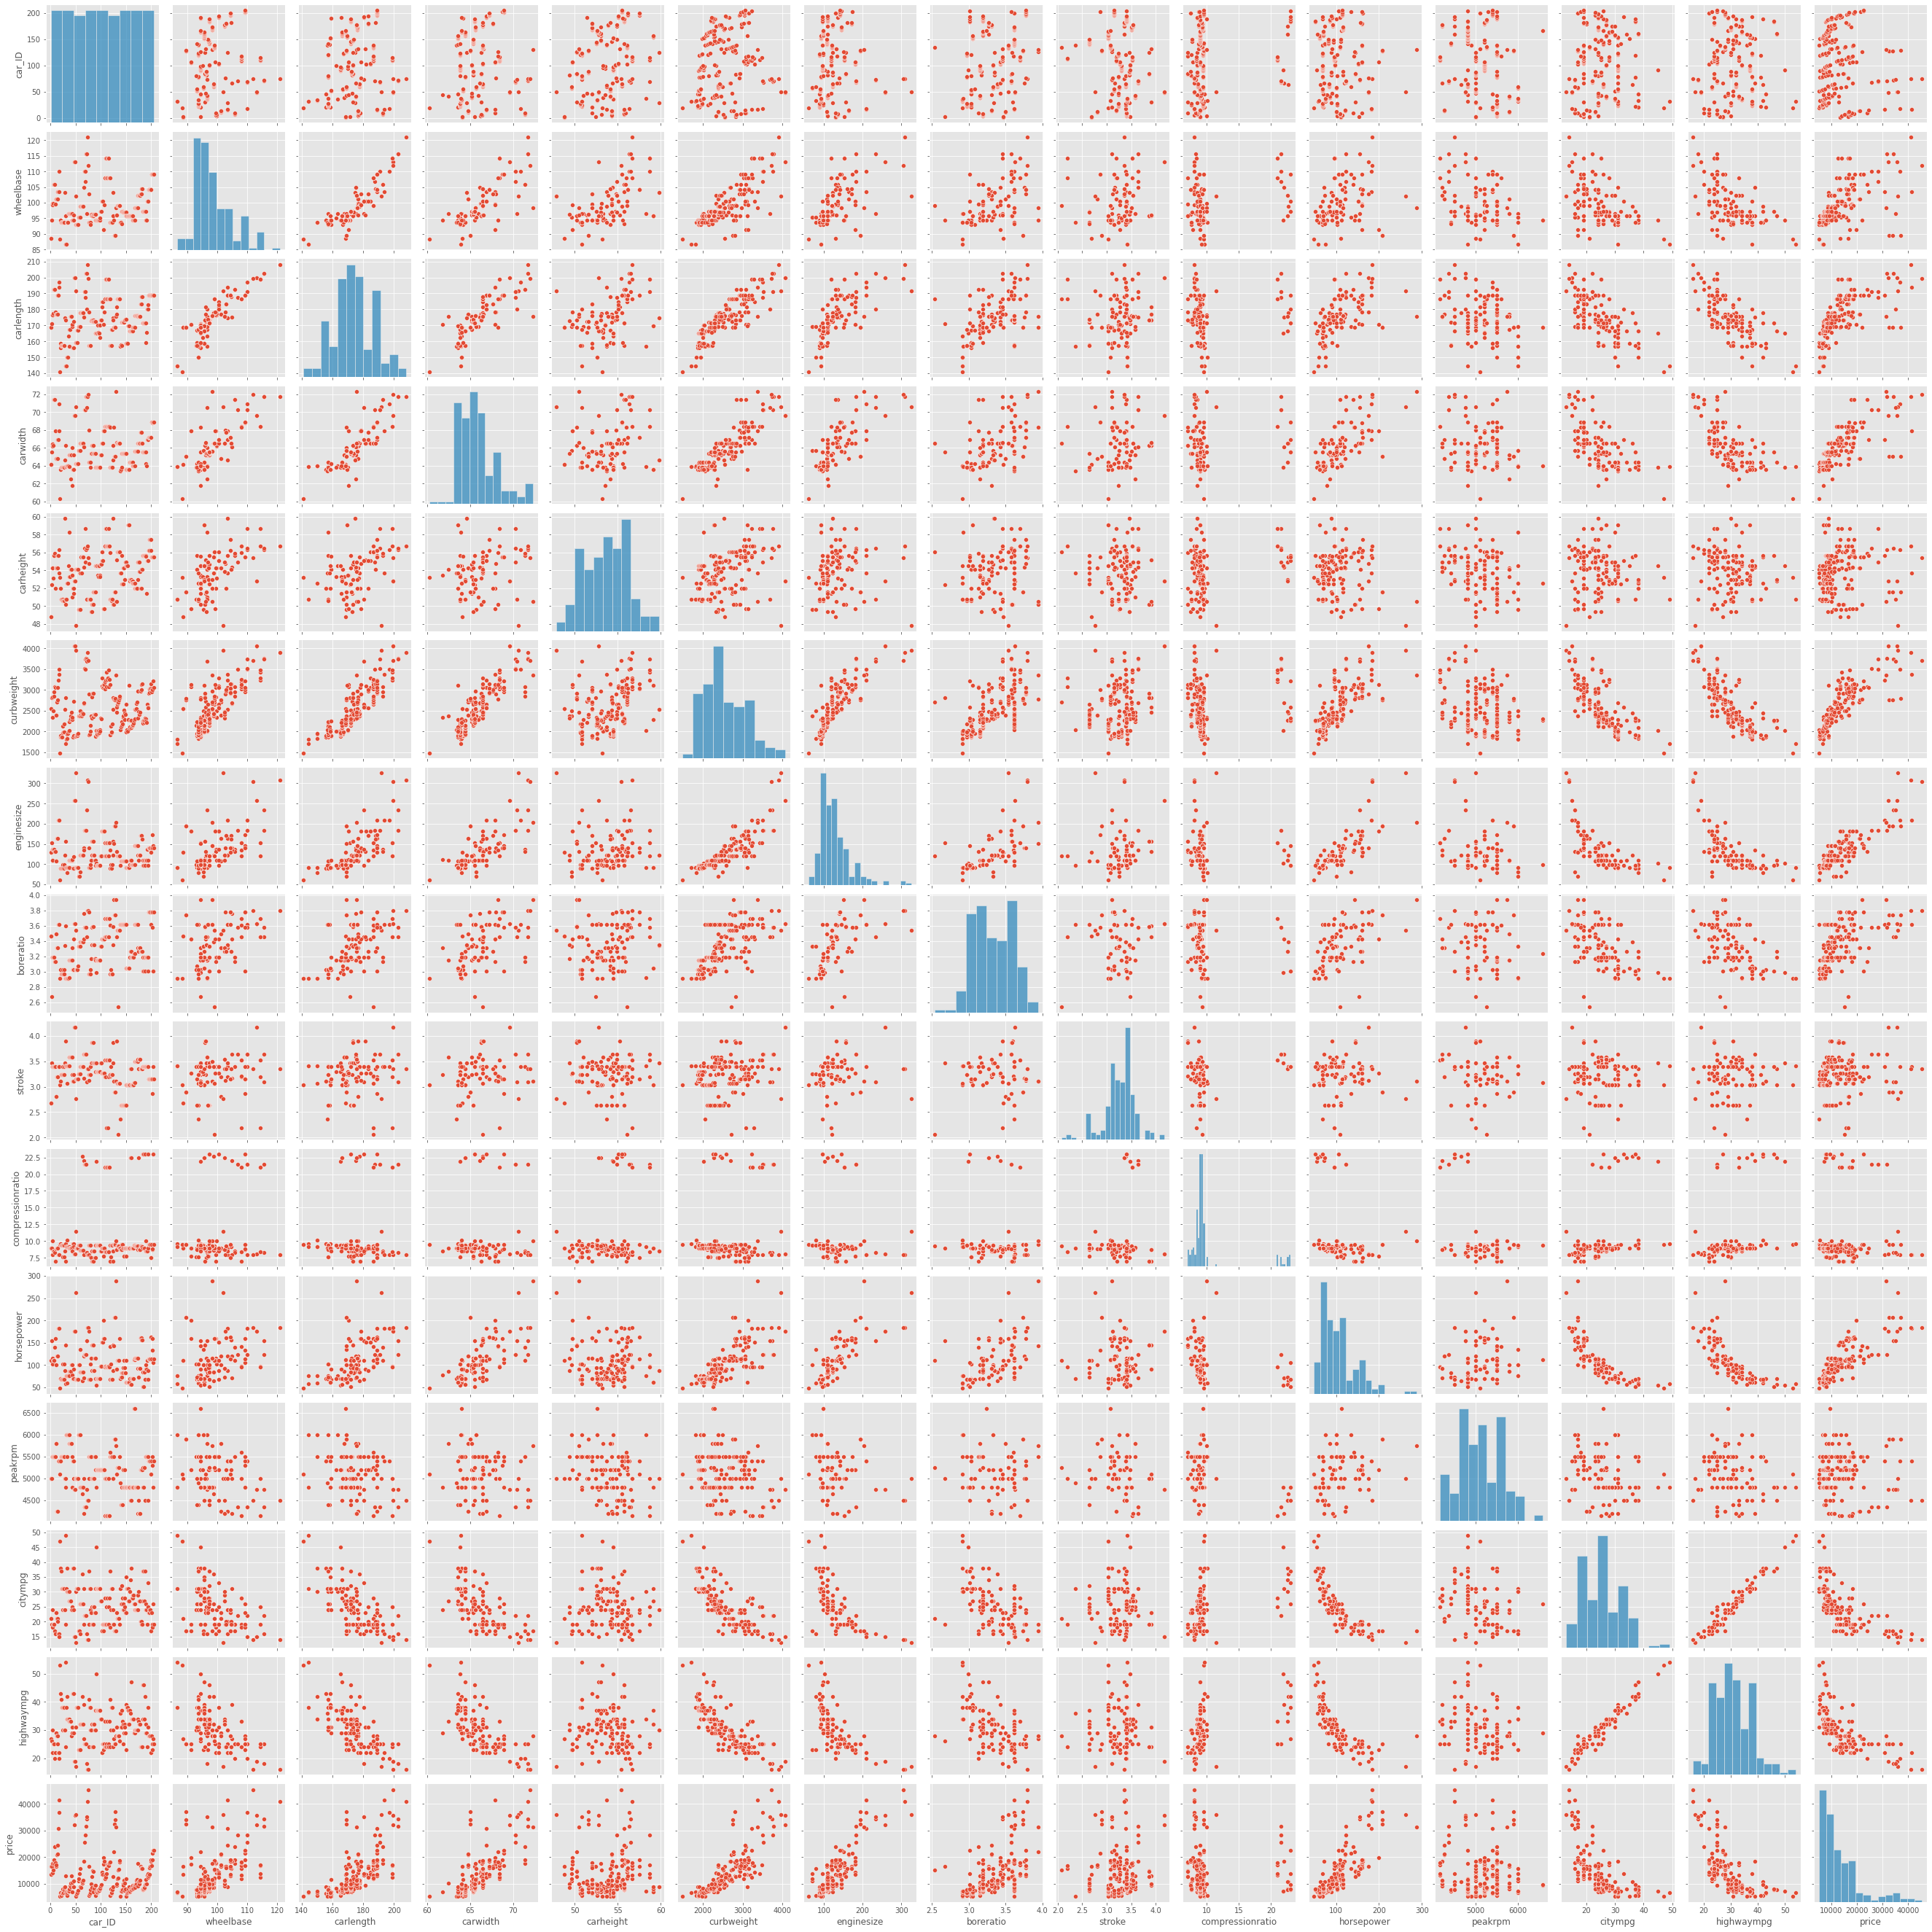

In [ ]:
sns.pairplot(car_data)

Indepth look at the current prices of all the cars and comparing price with the following feature indentified above

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

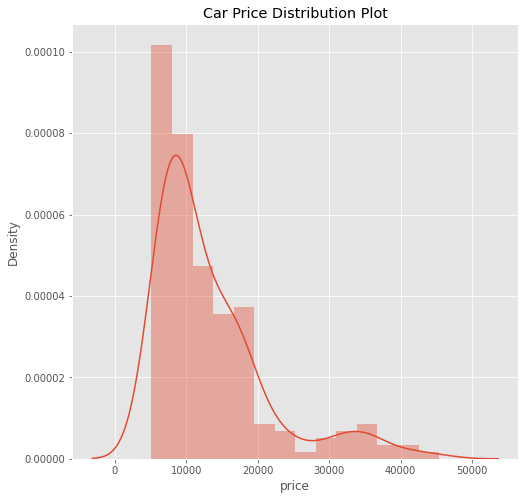

In [ ]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(car_data['price'])
car_data["price"].describe()

Text(0, 0.5, 'Count of Cars')

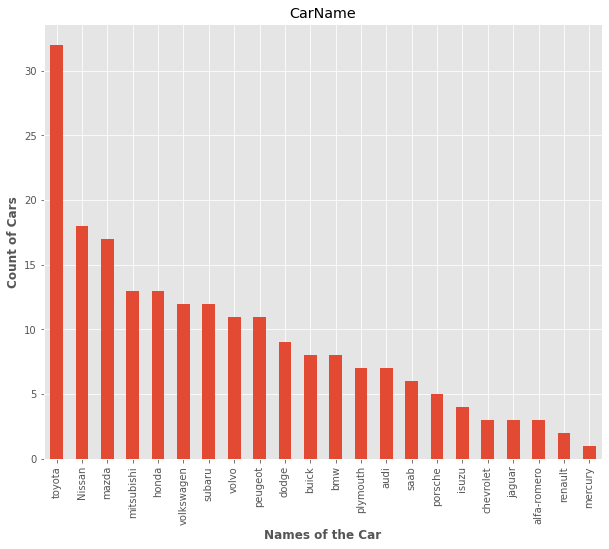

In [ ]:
plt.figure(figsize=(10,8))
car_data['CarName'].value_counts().plot(kind='bar',stacked=True)


plt.title('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

Text(0.5, 1.0, 'Car Company Brand Name vs Price')

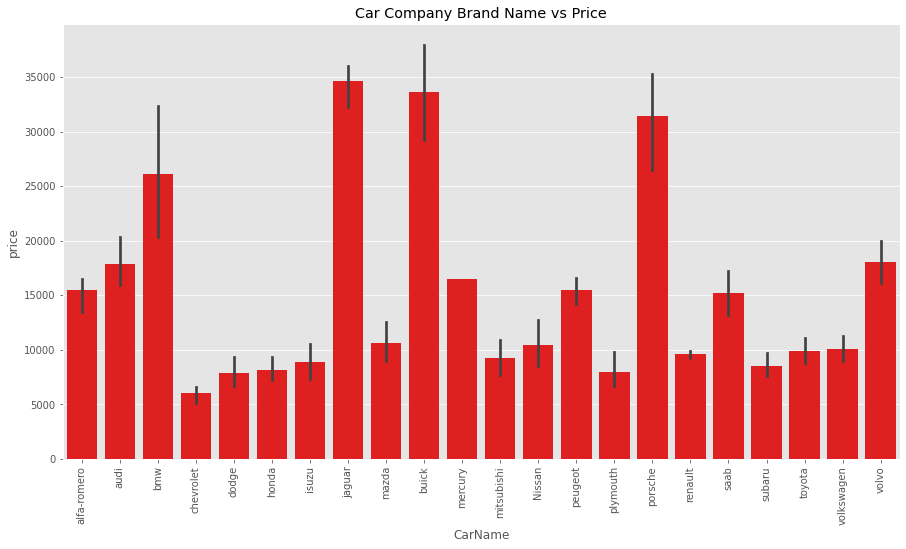

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot(x="CarName", y="price", data=car_data, color = "red")
plt.xticks(rotation=90)
plt.title('Car Company Brand Name vs Price')

The barplot above shows the prices of the various car brands sold in the US. The thick black lines reprresent the range 

<Figure size 1080x576 with 0 Axes>

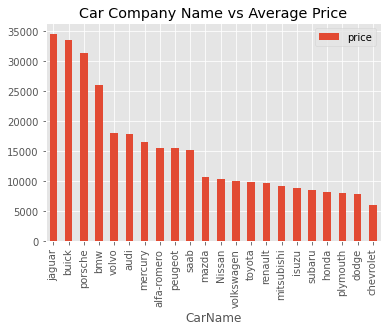

In [ ]:
# is this redundant ?

plt.figure(figsize=(15, 8))

car_data1 = pd.DataFrame(car_data.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
car_data1.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

#plt.figure(figsize=(15,8))
#sns.barplot(x="CarName", y="price", hue="aspiration", data=car_data)
#plt.xticks(rotation=90)

Visualization for the 6 numerical features considered from pairplot.

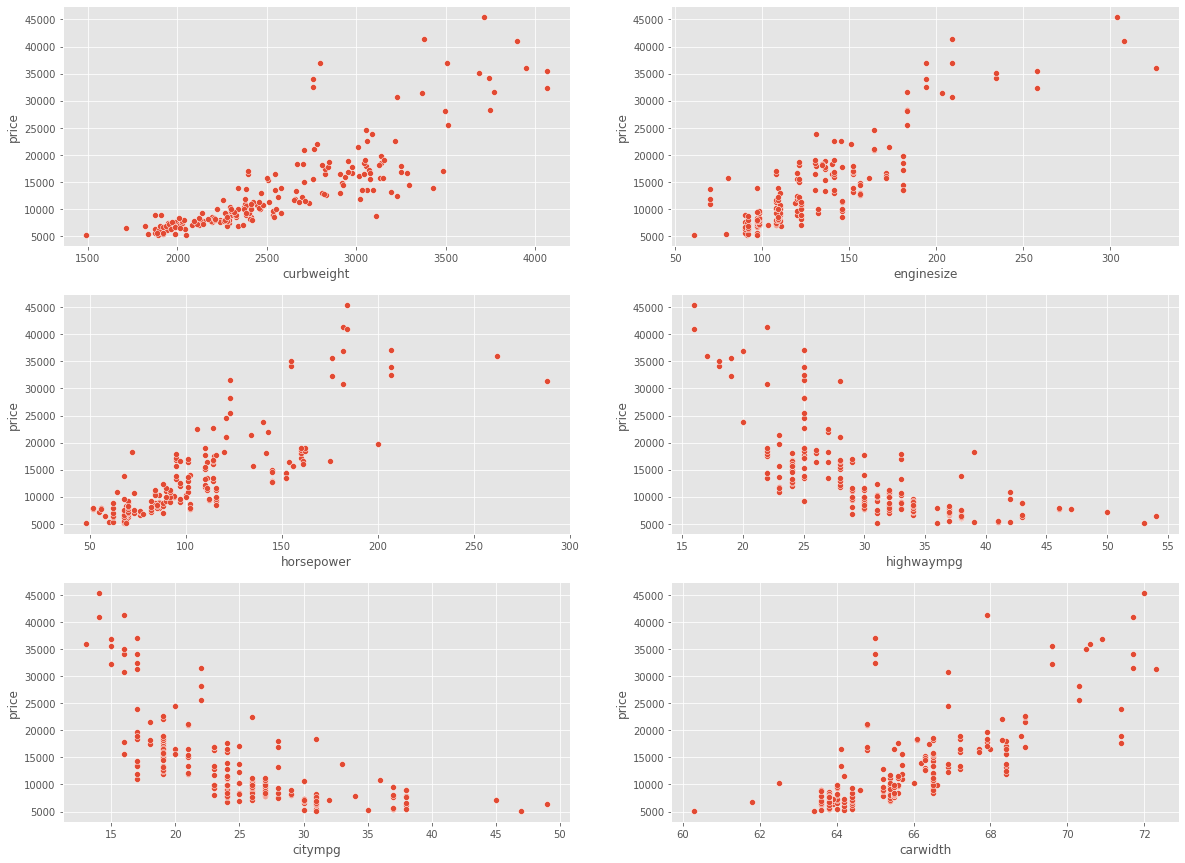

In [ ]:
plt.figure(figsize=(20, 15))
plt.subplot(3,2,1)
sns.scatterplot(x = 'curbweight', y = 'price', data = car_data)
plt.subplot(3,2,2)
sns.scatterplot(x = 'enginesize', y = 'price', data = car_data)
plt.subplot(3,2,3)
sns.scatterplot(x = 'horsepower', y = 'price', data = car_data)
plt.subplot(3,2,4)
sns.scatterplot(x = 'highwaympg', y = 'price', data = car_data)
plt.subplot(3,2,5)
sns.scatterplot(x = 'citympg', y = 'price', data = car_data)
plt.subplot(3,2,6)
sns.scatterplot(x = 'carwidth', y = 'price', data = car_data)

Visualization for 4 categorical features to examine relation with the price. We chose boxplots becasue it give us alot of information just by looking at it. 


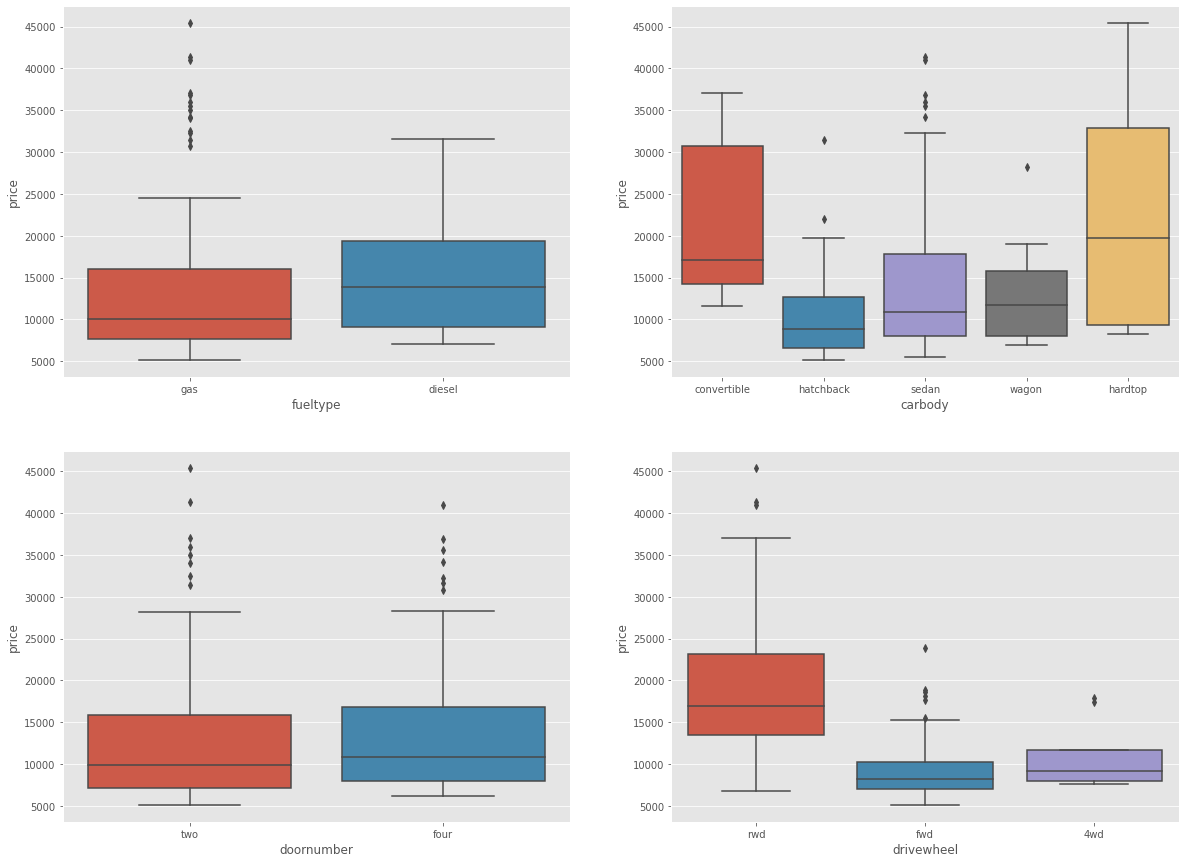

In [ ]:
plt.figure(figsize=(20, 15))
plt.subplot(2,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_data, )
plt.subplot(2,2,2)
sns.boxplot(x = 'carbody', y = 'price', data = car_data)
plt.subplot(2,2,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_data)
plt.subplot(2,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_data)


### Inference
1. Average deisel car is more expensive that the average gas powered car.
2. With regards to carbody, hardtop has the highest price while hatchback has the lowest price.
3. While there is a prsence of outliers, there isnt a significant disparity between the prices of cars with different number of door.
4. Drivewheel fwd cars are markedly more pricy than both fwd and 4wd drivewheel cars 

## Data Preparation 

Encoding the categorical variables in order to carry out statistics functions on the features.


In [ ]:
lab=LabelEncoder()
car_data['fuelsystem']=lab.fit_transform(car_data['fuelsystem'])
car_data['cylindernumber']=lab.fit_transform(car_data['cylindernumber'])
car_data['enginetype']=lab.fit_transform(car_data['enginetype'])
car_data['enginelocation']=lab.fit_transform(car_data['enginelocation'])
car_data['drivewheel']=lab.fit_transform(car_data['drivewheel'])
car_data['carbody']=lab.fit_transform(car_data['carbody'])
car_data['doornumber']=lab.fit_transform(car_data['doornumber'])
car_data['aspiration']=lab.fit_transform(car_data['aspiration'])
car_data['fueltype']=lab.fit_transform(car_data['fueltype'])
car_data['CarName']=lab.fit_transform(car_data['CarName'])

In [ ]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


## Correlation Heatmap

A correlation matrix is used to find the correlation between each column in a dataset. It measures the strength of the relationship between variables and ranges from -1 to 1. 


*   +/-0.7 Strong relationship
*   +/-0.3 indicates little or no relationship



In [ ]:

corr = car_data.corr()
corr.style.background_gradient(cmap="inferno")

,car_ID,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,0.834691,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,0.170636,0.052387,0.255960,0.071962,-0.075130,-0.040912,-0.033930,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
CarName,0.834691,1.000000,-0.065597,0.060091,-0.143542,0.053781,-0.007548,0.060707,0.061688,0.057615,-0.033914,0.158837,-0.026969,-0.163265,0.008118,-0.157652,0.146779,0.201519,-0.201044,0.086201,-0.091439,-0.143058,0.053777,0.055715,-0.173728
fueltype,-0.125568,-0.065597,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,-0.284631,-0.217275,0.082695,0.110617,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.067729,0.060091,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,0.087311,0.324902,-0.102963,-0.133119,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.190352,-0.143542,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,-0.207168,-0.552208,-0.197379,0.062431,0.154322,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,0.098303,0.053781,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,0.131710,0.568534,0.128467,-0.037024,-0.048408,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,0.051406,-0.007548,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,0.470751,-0.019719,0.575111,-0.116823,0.223238,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.051483,0.060707,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,-0.051698,-0.106234,0.050468,0.114127,0.135541,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.129729,0.061688,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,-0.135577,-0.184596,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,0.057615,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,0.841118,0.491029,0.877728,-0.113291,-0.109585,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920


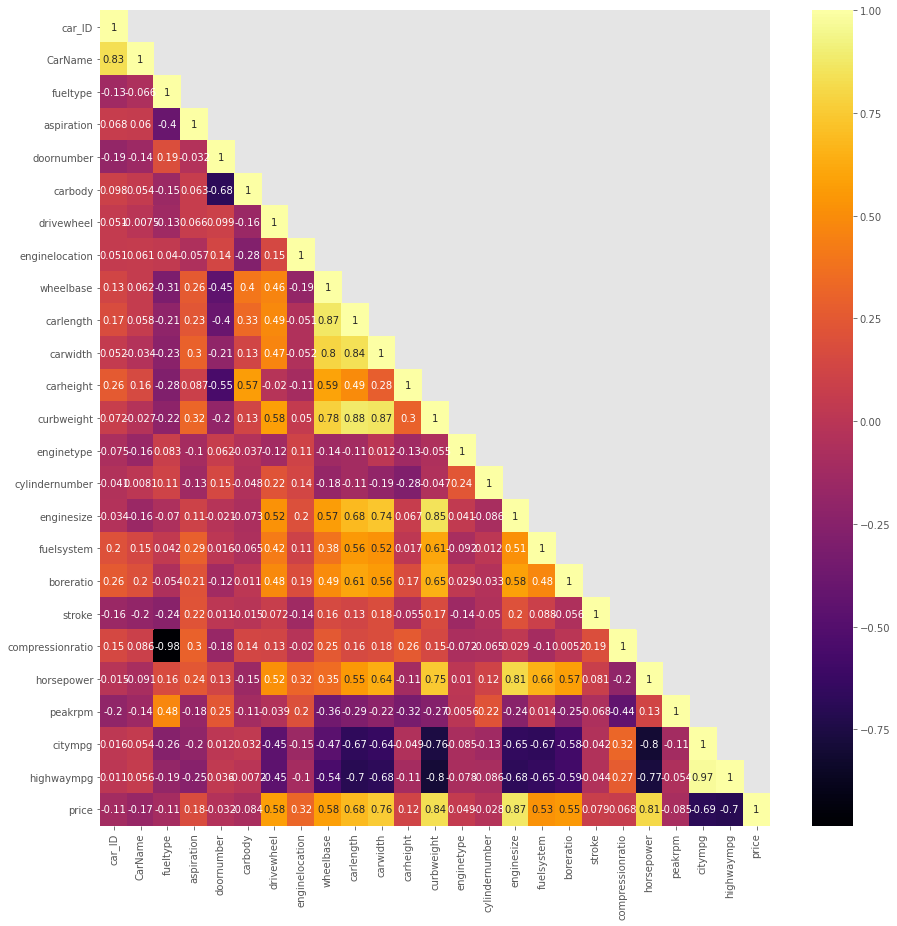

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(car_data.corr(),annot=True,cmap='inferno',mask=np.triu(car_data.corr(),k=1))

From the heat map the following features curbweight,enginesize,horsepowe,are strongly positively correlated with price. While the following festures citympg, highwaympg are strongly negatively correlated with price. 

## Univariate Linear Regression

We would run Linear regressions for the features considered above. This is to further ascertain how well the line of best fit can be used to predict the price i.e R squared.

R squared (Price & Horsepower): 0.653088356490231


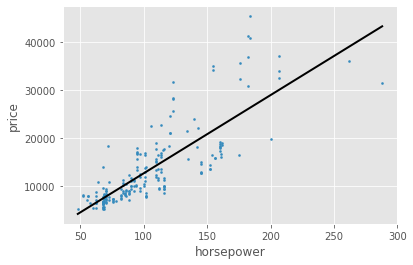

In [ ]:
# Create arrays for features and target variable
X_h = car_data['horsepower'].values
y = car_data["price"].values

# Reshape X and y
y = y.reshape(-1,1)
X_h = X_h.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_h), max(X_h)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_h, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (Price & Horsepower):",reg.score(X_h, y))

# Plot regression line
car_data.plot(kind="scatter", x ='horsepower', y='price',s = 4)
plt.plot(prediction_space, y_pred, color='black', linewidth=2)
plt.show()

R squared (Price & Enginesize): 0.7641291357806176


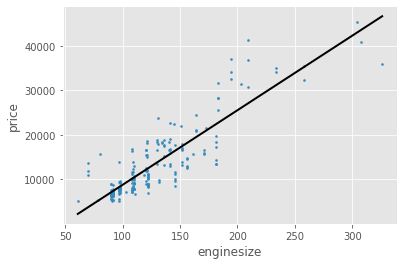

In [ ]:
# Create arrays for features and target variable
X_e = car_data['enginesize'].values
y = car_data["price"].values

# Reshape X and y
y = y.reshape(-1,1)
X_e = X_e.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_e), max(X_e)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_e, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (Price & Enginesize):",reg.score(X_e, y))

# Plot regression line
car_data.plot(kind="scatter", x ='enginesize', y='price',s = 4)
plt.plot(prediction_space, y_pred, color='black', linewidth=2)
plt.show()

R squared (Price & Curbweight): 0.6977342414446954


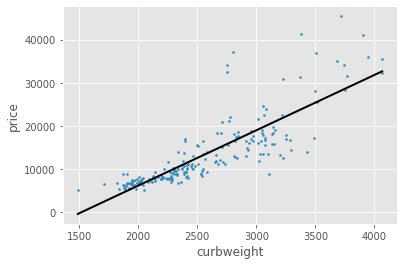

In [ ]:
# Create arrays for features and target variable
X_c = car_data['curbweight'].values
y = car_data["price"].values

# Reshape X and y
y = y.reshape(-1,1)
X_c = X_c.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_c), max(X_c)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_c, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (Price & Curbweight):",reg.score(X_c, y))

# Plot regression line
car_data.plot(kind="scatter", x ='curbweight', y='price',s = 4)
plt.plot(prediction_space, y_pred, color='black', linewidth=2)
plt.show()

R squared (Price & Carwidth): 0.5765749108275359


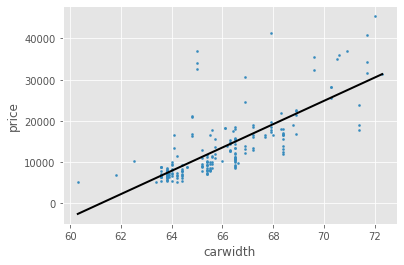

In [ ]:
# Create arrays for features and target variable
X_d = car_data['carwidth'].values
y = car_data["price"].values

# Reshape X and y
y = y.reshape(-1,1)
X_d = X_d.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_d), max(X_d)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_d, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (Price & Carwidth):",reg.score(X_d, y))

# Plot regression line
car_data.plot(kind="scatter", x ='carwidth', y='price',s = 4)
plt.plot(prediction_space, y_pred, color='black', linewidth=2)
plt.show()

## Multivariate Linear Regression

Multiple linear regression would be run on the feature with R square greater than 0.6 based on the prominent features observed from the heatmap. 

In [ ]:
# Create arrays for features and target variable
X = car_data[['horsepower','carwidth','curbweight','enginesize']].values
y = car_data["price"].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7758631573177658
Root Mean Squared Error: 3940.7082953616637


### Standardization

In [ ]:
"""
scaler = StandardScaler()
scaler.fit(car_data)
car_data["New_data"] =scaler.transform(car_data)
car_data1.head()
"""

'\nscaler = StandardScaler()\nscaler.fit(car_data)\ncar_data["New_data"] =scaler.transform(car_data)\ncar_data1.head()\n'

## Lasso Regularization

[-2.62988481e+01  6.23448598e+01  6.25708605e+01  5.70193951e+02
  6.76847482e+02 -7.78940538e+02 -9.35726050e+02  1.12862044e+03
  1.05126061e+04  1.02746565e+02 -2.84822765e+00  5.81288150e+02
  2.90267009e+02  2.41758213e+00  2.91976015e+02 -2.06333658e+01
  9.01237775e+01  6.13278488e+01 -1.43687374e+03 -2.62228402e+03
  1.67122234e+02  2.75875996e+01  1.54184636e+00 -6.90540597e+01
  1.01366298e+02]


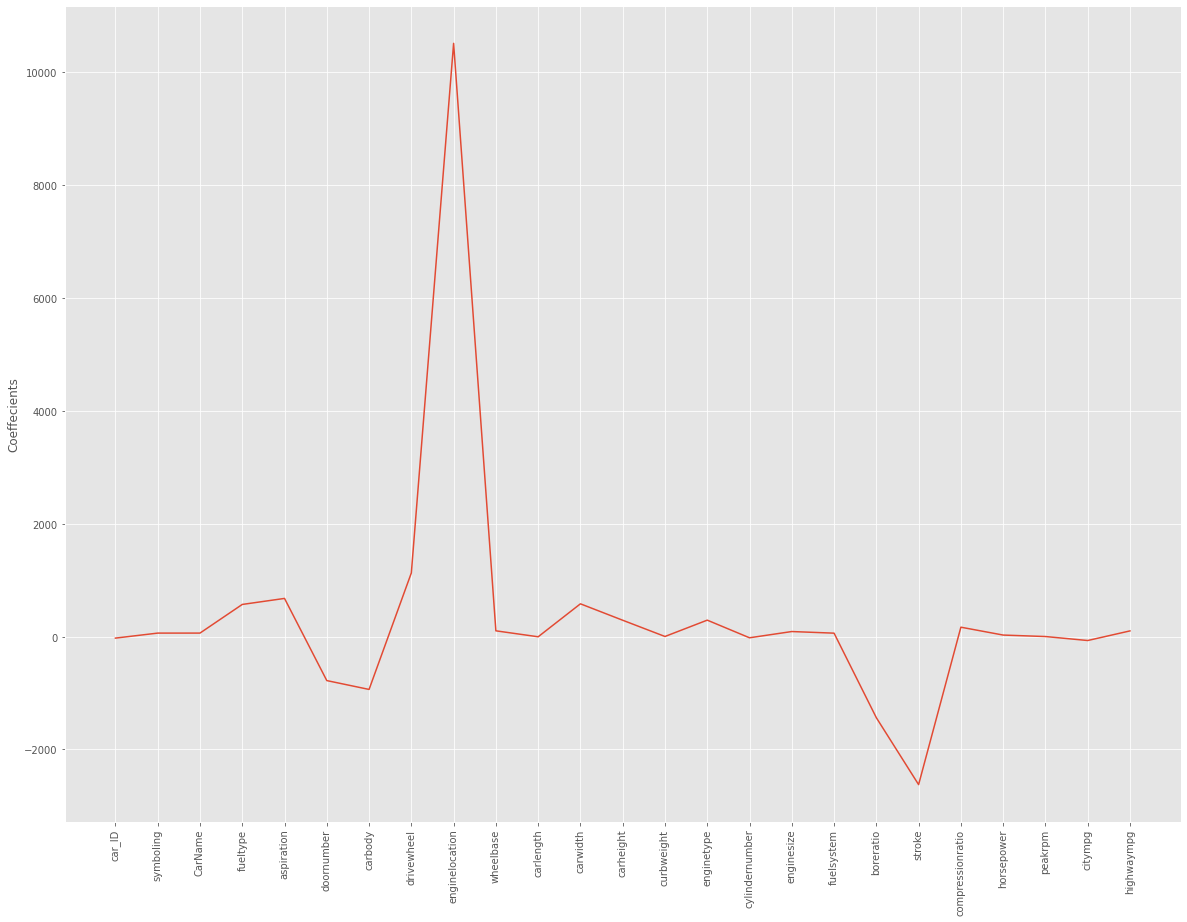

In [ ]:
# Create arrays for features and target variable
#X = car_data.drop("cat_col",axis=1).values
X = car_data.drop("price" ,axis=1).values
y = car_data["price"].values

# Create training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Initiate a lasso regressor: lasso
#lasso = Lasso(alpha=0.1, normalize=True)

# Fit the regressor to the data
#lasso_fit = lasso.fit(X_train, y_train)

#Predict
#lasso_predict = lasso.predict(X_test)

# Compute and print the coefficients
#lasso.score(X_test, y_test)

names = car_data.drop("price", axis=1).columns

lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

plt.figure(figsize=(20, 15))
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation =90)
_ = plt.ylabel("Coeffecients")

plt.show()

Not clear on the lasso plot. I'll rework it after doing some reserach